In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import matplotlib.pyplot as plt
import pandas as pd
import collections
import string
%matplotlib inline

from cipherbreak import *

c7a = open('7a.ciphertext').read()
c7b = open('7b.ciphertext').read()

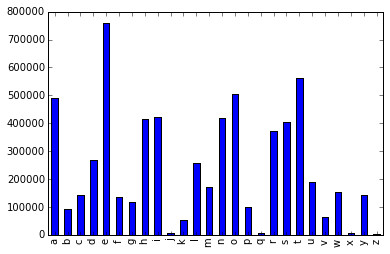

In [2]:
freqs = pd.Series(english_counts)
freqs.plot(kind='bar')

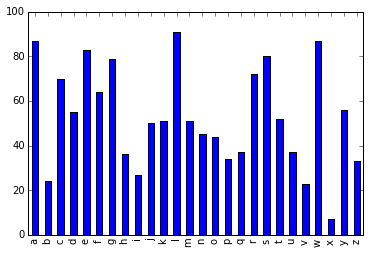

In [3]:
freqs_7a = pd.Series(collections.Counter([l.lower() for l in c7a if l in string.ascii_letters]))
freqs_7a.plot(kind='bar')

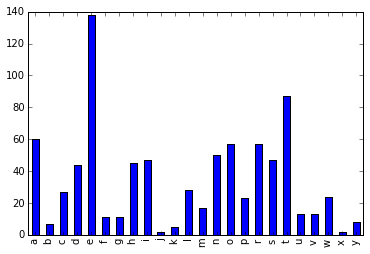

In [4]:
freqs_7b = pd.Series(collections.Counter([l.lower() for l in c7b if l in string.ascii_letters]))
freqs_7b.plot(kind='bar')

In [5]:
c7as = sanitise(c7a)
c7as

'veyjmyjkrzilysyjeydorulcsrcjnmoiddeugurlogfsnwcrlhckhghmwkejxlyktlagflalvtmgkyyomvlmgkyjosfdrzepwaqgnrzeqzinoaqforkcsltjwdussrzarlhcnajneqzabbakeebatjgoiklgcerzebjidlwmgdussnmljwdgftmlhceeazalasksnbtlmukcvtfwilderhrckuksbjqtfwcpwwfsdydrcsdwsbyfdmfeblhcneqkejohguhussjmciqfmjuqoirzosltfwsfapuwwmmlbzatwhyvnmadcstfstrzedvafsdzwelgpcjaraneanrzeqwwylepkscshmjscaslglmfgcjakqsrwrwlhcuurswyqollhcktyjbmsrbkibwcjwapwdyfapwamxapgulvfgnekwtcjsqiuyjeuatfsdgktgfcravcharlepfodtojlsdssrwncvtmjegffmjccvdcukndarwsgkaukokwtfanediiwtfasmfaqmbpwsamekasqaolscmmpjwodqeyjsyyouzellhcqfgltcvajgcydsfapuatfsjsjypagewdgfsnwcraolkyqleklhcveacpjstckcyfcyjrwscpsncveqaglwdrgdchlmqaljotsrceorwonwrylebnefacjwdckiefebxopmnbwrqwamhepstggnqawykajjeyvyagnawrlwdytosltfwrcxepwnawtmlhcuazdeqanrzejssrhaplodlhcxdydoeturlhcfevlscutggnfsskwrcsljqwmjrgwdgliqwnajynleboirzakgrckeamrceobafgwdyesagtpsnqhoqatggnaapfwryfdrwljkuqohyltfwyuwrcjeydlwmprgwfstgvollulvepktyfdgkhmotfwwfglcssqwmzdygkpmoepwdrzeqgrrgfagmnmtgfgrzeweuqlbcvogfggkrcslj

In [6]:
c7bs = sanitise(c7b)
c7bs

'anwaecnndrtwtanireoahsrdntieerdctewayerevaaarpioerobsedescrehlaoitithsdtrinosepeplthtnidtwsduledlhotpeaterhaaredeoaiodtahregerothwhtsureteeinwigiresetpowicooonitseudseechacteofiileonewiotacteodteuneahsedaptryemronmomlexontkemeoyvitsteenhantrertieineotndlhpoplyitewitrsedeevdycfrmnsnaypinmteeneeinahinepritedehveleaorelllvmocnahncepherohjuuvehautathttetoasipowwneedselopgdeslfedterfcaatehjasdtrprleseeretetecneorrsgckamiiwaefutiashaongcthsrenrehtrsthhaceinwtprloghetodaeraloeedeatsomldwedtwefsbelevpdteonoignsavftegsebomcehatietnrsptonthusorecredendcetlwaehesedrncveracuhoihaleinaemeunherdesttstasipedeyleeemtiisiigothntssfolnitretrwhemtkhhswtorcssnererohteencsapeblircnthuleofenrsromrnshmaddaodeatihioroutwevthapeceetovterdleaditewdottttcatkmbhtheicwantnisedwatxankeabovoanmswlprgaispodfogndpedeswrdacttrefhdesyaberretlavod'

In [7]:
key_a, score = vigenere_frequency_break(c7as)
key_a, score

('say', -1726.4679903722085)

In [8]:
' '.join(segment(vigenere_decipher(c7as, key_a)))

'dear mark things area lot clearer now i flew out to inspect the ship myself last night and took a good look around the reason the ship was not scuttled was that the valves had jammed it looks like the driftwood was pulled into the mechanism and blocked the inlet presumably the crew had already abandoned the vessel which was lucky for us without the ship we would have had no idea that the fda had been operating in these waters seahorse is no longer a mystery the cutaway on the starboard side cleared an area of around five meters square with a distinctive pattern of bolts fastened to reinforced deck plates i saw something like this on a sub rescue mission a couple of years ago when they fitted a local ship with a jury rigged inspection system the deck plates can carry a crane designed to deploy an rova remote operated vehicle designed for undersea operations i was already concerned about the reference to the cables in the last part of the fda log but the next section has me really worri

In [9]:
key_b, score = amsco_break(c7bs)
key_b, score

(((1, 2, 0, 4, 3), (2, 1), <AmscoFillStyle.continuous: 1>),
 -1902.8377732825452)

In [12]:
' '.join(segment(amsco_transposition_decipher(c7bs, key_b[0], fillpattern=key_b[1], fillstyle=key_b[2])))

'phase seven we approached the cable junction undercover of night with nautilus at an elevation of three feet towing seahorse to starboard comms interception showed that we remained undetected and seahorse was deployed at operating depth the various layers of armoured protection were removed from the cable and as expected once the steel jacket was removed the other layers provided little resistance the divers entered the water and cut into the core to insert the optical repeaters linking them back to the man in the middle unit which was powered up and fully tested initial tests showed that it was operating as expected and three keys have already been recovered from the omani transmissions with daylight approaching the remaining tests were postponed for the following night and the ship returned to deeper waters where it remained at low deck height the divers were left at seahorse to decompress slowly and will be recovered tomorrow once the final tests have been concluded'

In [11]:
transpositions[key_b[0]]

['cable',
 'facto',
 'facts',
 'gabon',
 'hafts',
 'hefts',
 'ibexs',
 'kabul',
 'lacys',
 'ladys',
 'laius',
 'lefts',
 'macon',
 'macro',
 'macys',
 'malts',
 'melon',
 'melts',
 'negro',
 'oahus',
 'obeys',
 'obits',
 'odets',
 'pacts',
 'pants',
 'pelts',
 'pints',
 'piotr',
 'pious',
 'plots',
 'plows',
 'ploys',
 'rafts',
 'rants',
 'remus',
 'rents',
 'riots',
 'scout',
 'shout',
 'snout',
 'cabbed',
 'cabbie',
 'cabbys',
 'cabral',
 'dabble',
 'faeroe',
 'gabbro',
 'ibexes',
 'jaguar',
 'kaboom',
 'kaftan',
 'lacuna',
 'lagoon',
 'lefter',
 'legume',
 'macaws',
 'magyar',
 'malays',
 'maltas',
 'mellon',
 'negevs',
 'nellys',
 'nelson',
 'odious',
 'paddys',
 'panzas',
 'peggys',
 'pelves',
 'pennys',
 'photos',
 'pinups',
 'qantas',
 'rabats',
 'rallys',
 'refuse',
 'refute',
 'remuss',
 'renews',
 'repute',
 'scouts',
 'shouts',
 'snouts',
 'cabbage',
 'cabrera',
 'dabbled',
 'gadwall',
 'ladonna',
 'leftest',
 'madonna',
 'malayan',
 'million',
 'papacys',
 'pellets',
 'penn